## Evaluate VAE (Encoder/Decoder quality)

The dataset used here is used later for training the RL agent, so we can perform a direct comparison between the results here and the results obtained from RL

In [6]:
from config import Config
from data_prep import DataPrep
from env import CMAPSSEnv

const = Config()
neurons = const.VAE_neurons

# Data prep
data = DataPrep(file = const.file_path,
                num_settings = const.num_settings,
                num_sensors = const.num_sensors,
                num_units = const.num_units[2],
                prev_step_units = const.prev_step_units[2],
                step = const.step[2],
                normalization_type="01")

df = data.ReadData()

df

,Unit,NormTime,OpSetting1,OpSetting2,OpSetting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,241,0.994536,0.595099,0.736342,0.0,0.238089,0.010311,0.051374,0.010265,0.293184,...,0.088637,0.001434,0.060915,0.915211,0.0,0.031915,0.000000,0.0,0.136864,0.142847
1,241,0.989071,0.999976,0.997625,1.0,0.000000,0.128061,0.287673,0.226278,0.000000,...,0.003430,0.993245,0.573673,0.384477,0.0,0.287234,0.627907,1.0,0.012036,0.008898
2,241,0.983607,0.000038,0.001188,1.0,1.000000,0.985454,0.937133,0.936451,1.000000,...,0.997714,0.993493,0.709531,0.042082,1.0,0.946809,1.000000,1.0,0.986589,0.985913
3,241,0.978142,0.833151,0.998694,1.0,0.060269,0.183392,0.326677,0.227443,0.146592,...,0.134517,0.993410,0.532670,0.344712,0.0,0.308511,0.651163,1.0,0.151994,0.153282
4,241,0.972678,0.476128,0.831354,1.0,0.626985,0.661941,0.648225,0.551313,0.507937,...,0.471915,0.993769,0.529251,0.333493,0.0,0.617021,0.864693,1.0,0.486245,0.496670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,260,0.012658,0.476188,0.831354,1.0,0.626985,0.674461,0.690850,0.591580,0.507937,...,0.468918,0.996250,0.807527,0.351775,1.0,0.691489,0.864693,1.0,0.484869,0.480615
4360,260,0.009494,0.238102,0.298100,1.0,0.597937,0.647026,0.742197,0.726984,0.617180,...,0.614155,0.994596,0.997888,0.151333,1.0,0.744681,0.854123,1.0,0.613480,0.620190
4361,260,0.006329,0.595222,0.736342,0.0,0.238089,0.017952,0.089171,0.066946,0.293184,...,0.087061,0.007279,0.308771,1.000000,0.0,0.063830,0.000000,0.0,0.135144,0.137297
4362,260,0.003165,0.595203,0.738717,0.0,0.238089,0.021267,0.080147,0.087724,0.293184,...,0.088662,0.007334,0.311838,0.995586,0.0,0.074468,0.000000,0.0,0.130330,0.127092


In [7]:
# List of engine lifetimes
engine_lives = df.groupby(df['Unit']).size().tolist()
num_engines = len(engine_lives)

In [8]:
# Load encoder and decoder
import tensorflow as tf

encoder = tf.keras.models.load_model("./saved_models/encoder", compile=False)
decoder = tf.keras.models.load_model("./saved_models/decoder", compile=False)

total_encoded_data = encoder.predict(df.iloc[:,1:], verbose=0)
total_decoded_data = decoder.predict(total_encoded_data, verbose=0)

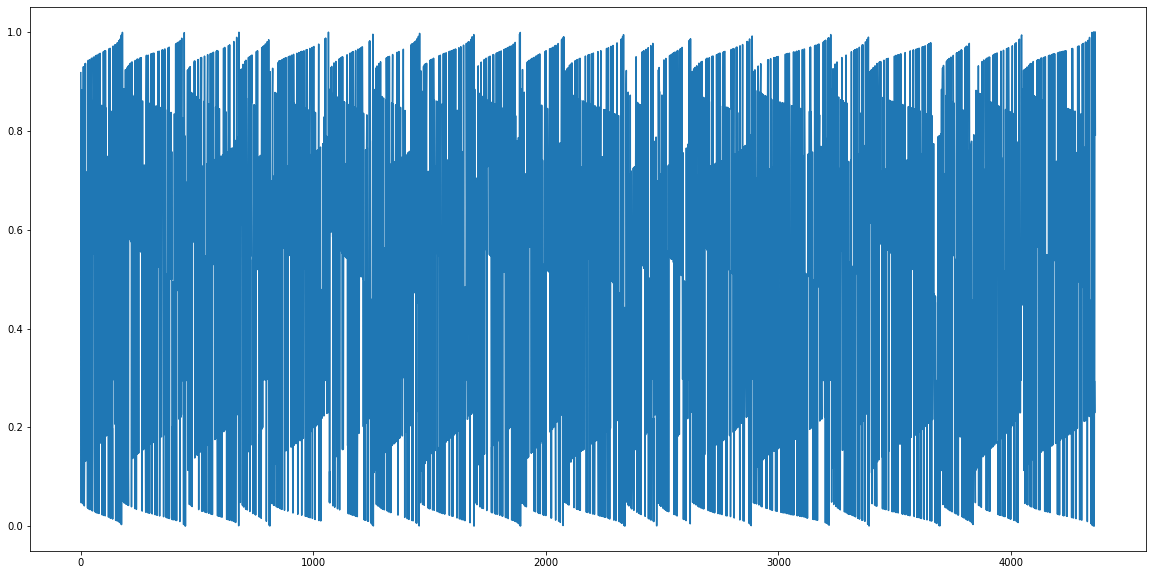

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(total_encoded_data)

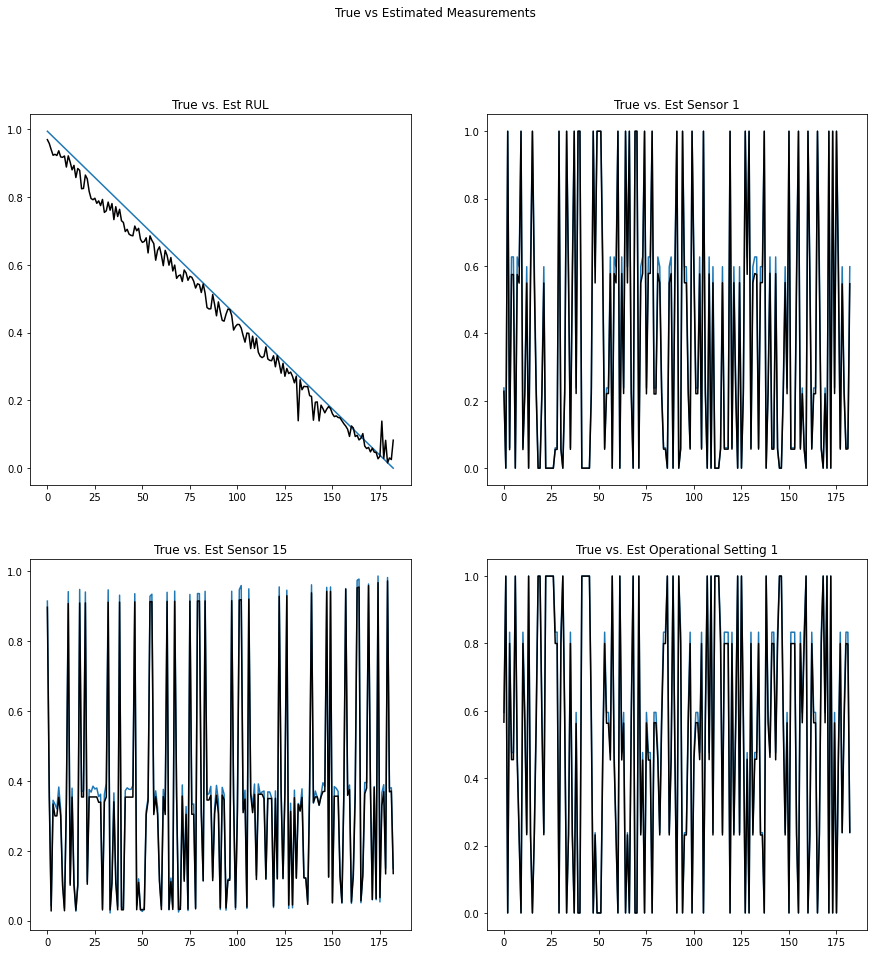

In [11]:
import pandas as pd

decoded_df = pd.DataFrame(total_decoded_data, columns = df.columns[1:])

fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('True vs Estimated Measurements')
plt.rcParams["figure.figsize"] = (10,10)

axs[0, 0].plot(df['NormTime'].iloc[0:engine_lives[0]])
axs[0, 0].plot(decoded_df['NormTime'].iloc[0:engine_lives[0]], color='black')
axs[0, 0].title.set_text('True vs. Est RUL')

axs[0, 1].plot(df['Sensor1'].iloc[0:engine_lives[0]])
axs[0, 1].plot(decoded_df['Sensor1'].iloc[0:engine_lives[0]], color='black')
axs[0, 1].title.set_text('True vs. Est Sensor 1')

axs[1, 0].plot(df['Sensor15'].iloc[0:engine_lives[0]])
axs[1, 0].plot(decoded_df['Sensor15'].iloc[0:engine_lives[0]], color='black')
axs[1, 0].title.set_text('True vs. Est Sensor 15')

axs[1, 1].plot(df['OpSetting1'].iloc[0:engine_lives[0]])
axs[1, 1].plot(decoded_df['OpSetting1'].iloc[0:engine_lives[0]], color='black')
axs[1, 1].title.set_text('True vs. Est Operational Setting 1')

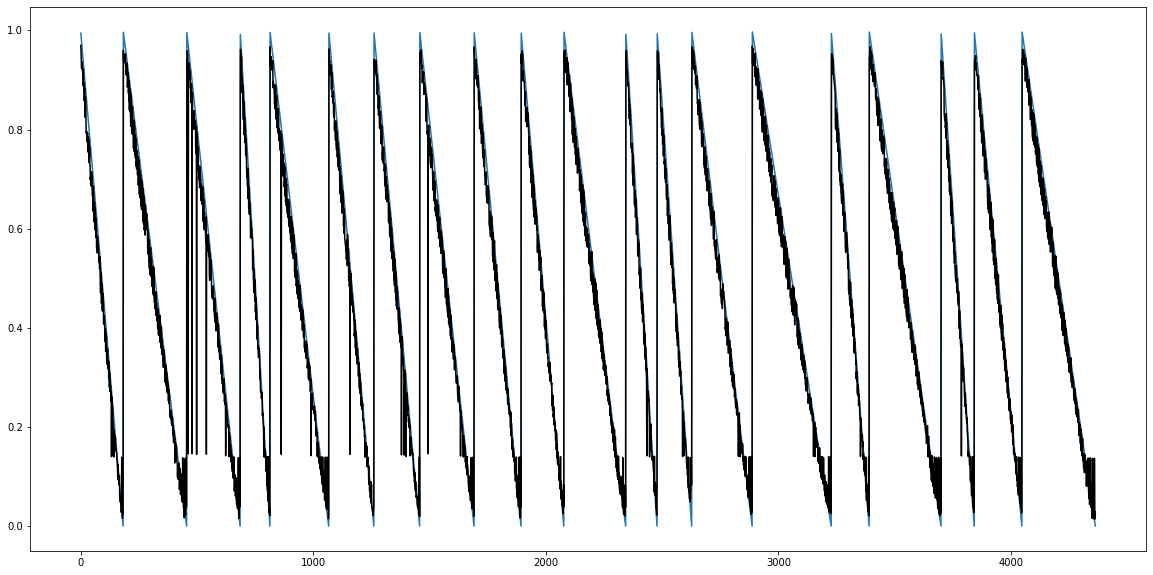

In [12]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(df['NormTime'])
plt.plot(decoded_df['NormTime'], color='black')

## Sequential plotting

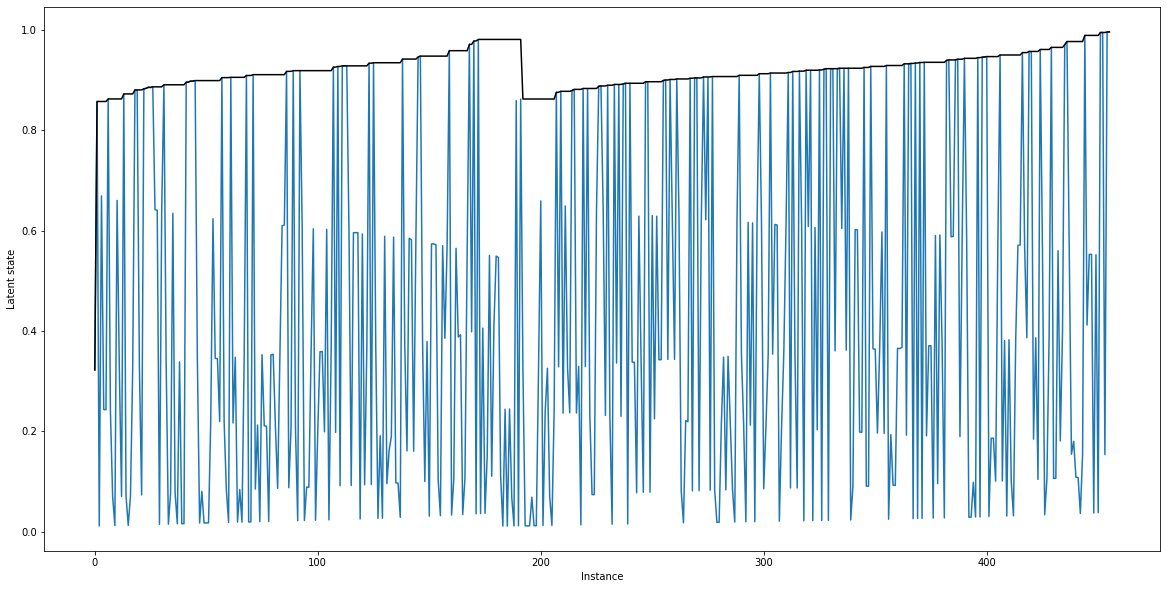

In [14]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Evaluation set size")

x_eval = []
avg_x_val = []

for i in range(len(df[:np.cumsum(engine_lives[:2])[-1]])):
    encoded_data = encoder.predict(tf.reshape(df.iloc[i,1:], [1, -1]), verbose=0)[0]
    decoded_data = decoder.predict(encoded_data, verbose=0)

    x_eval.append(encoded_data[0])
    avg_x_val.append(np.max(x_eval[-20:]))
    
    ax.cla()
    ax.plot(x_eval)
    ax.plot(avg_x_val, color='black')
    ax.set_xlabel('Instance')
    ax.set_ylabel('Latent state')
    display(fig)
    clear_output(wait=True)
    plt.pause(0.001)